**Data Description**

- ‘Customer_number’ :  Unique Customer Identification number
- ‘age’ : Age of customer in years
- ‘Annual Income’ : Annual income of the customer
- ‘balance’ : customer's bank balance
- ‘duration’ : Duration of call with the customer for Term loan
- ‘campaign’ : Number of contacts performed during this campaign and for this client
- ‘last_contact_day’ : Number of days that passed by after the client was last contacted from a previous campaign. and -1 implies the customer was not contacted.
- ‘previous’  : Number of contacts performed before this campaign and for this client
- ‘Count_Txn’ : Number of Transactions Done by the customer
- 'job' : Type of job the customer has
- 'marital' : Marital status of the customer
- 'education' : Highest education level of customer
- 'Gender' : Gender of the customer
- 'Insurance' : Has the customer taken insurance?
- 'housing' : Has the customer taken housing loan?
- 'loan' : Has the customer taken personal loan?
- 'contact' : Contact communication type
- 'poutcome' : Outcome of the previous marketing campaign
- 'Term Deposit' : Whether the customer subscribed a term deposit (fixed deposit) or not

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
Missing_values = np.nan

In [5]:
transaction_data = pd.read_excel("/content/Banking Case - Data.xlsx", sheet_name = "Transaction Data", na_values=Missing_values)

In [6]:
transaction_data.head(2)

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0


In [7]:
transaction_data.shape

(45211, 14)

In [8]:
customer_data = pd.read_excel("/content/Banking Case - Data.xlsx", sheet_name = "Customer Demographics", na_values=Missing_values)

In [9]:
customer_data.shape

(45211, 7)

In [10]:
customer_data.head(2)

,Customer_number,age,job,marital,education,Annual Income,Gender
0,1001,58,management,married,tertiary,839368,M
1,1002,44,technician,single,secondary,1452858,M


In [11]:
#merging both transaction data and customer data into one based on the common column
data = pd.merge(customer_data, transaction_data, on='Customer_number', how='inner')

In [12]:
data.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [13]:
data.shape

(45211, 20)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   job               45198 non-null  object 
 3   marital           45193 non-null  object 
 4   education         45190 non-null  object 
 5   Annual Income     45194 non-null  object 
 6   Gender            45211 non-null  object 
 7   Sno               45211 non-null  int64  
 8   Insurance         45211 non-null  object 
 9   balance           45156 non-null  object 
 10  housing           45211 non-null  object 
 11  loan              45203 non-null  object 
 12  contact           45168 non-null  object 
 13  duration          45172 non-null  float64
 14  campaign          45211 non-null  int64  
 15  last_contact_day  45211 non-null  int64  
 16  previous          45211 non-null  int64 

- Here few columns, Annual Income, balance are given as object but it is supposed to be numeric.
- Also the feature named "previous" is supposed to be categorical but is given as numeric.

In [15]:
#changing the datatypes of differently labeled columns

columns_to_numeric = ['Annual Income', 'balance']
data[columns_to_numeric] = data[columns_to_numeric].apply(pd.to_numeric, errors='coerce')
# 'errors='coerce'' will replace any non-numeric values with NaN.

#data[columns_to_numeric] = data[columns_to_numeric].astype(float)

In [16]:
data.dtypes

Customer_number       int64
age                   int64
job                  object
marital              object
education            object
Annual Income       float64
Gender               object
Sno                   int64
Insurance            object
balance             float64
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
dtype: object

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_number,45211.0,2.360600e+04,1.305144e+04,1001.0,12303.5,23606.0,34908.5,46211.0
age,45211.0,4.098000e+01,1.083827e+01,18.0,33.0,39.0,48.0,121.0
Annual Income,45193.0,2.596569e+06,1.393322e+06,200600.0,1386930.0,2586789.0,3803066.0,9458762.0
Sno,45211.0,2.260500e+04,1.305144e+04,0.0,11302.5,22605.0,33907.5,45210.0
balance,45130.0,1.417213e+03,3.022843e+03,-280.0,137.0,486.5,1440.0,102127.0
duration,45172.0,2.581395e+02,2.576315e+02,-167.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.762182e+00,3.087291e+00,0.0,1.0,2.0,3.0,63.0
last_contact_day,45211.0,4.183225e+01,9.945703e+01,-9.0,1.0,1.0,1.0,871.0
previous,45211.0,5.803234e-01,2.303441e+00,0.0,0.0,0.0,0.0,275.0
Count_Txn,45210.0,2.996150e+02,1.157218e+02,-423.0,200.0,300.0,400.0,499.0


- There are null values in few of the columns.
- The maximum value in the feature 'age' is 121 which seems like an outlier.
- There are preprocessing tasks to be done on the data.

In [18]:
data.select_dtypes(include= 'object').head()

,job,marital,education,Gender,Insurance,housing,loan,contact,poutcome,Term Deposit
0,management,married,tertiary,M,no,yes,no,NaN,unknown,no
1,technician,single,secondary,M,no,yes,no,unknown,unknown,no
2,entrepreneur,married,NaN,F,no,yes,yes,unknown,NaN,no
3,blue collar,married,unknown,F,no,yes,no,unknown,unknown,no
4,unknown,single,unknown,M,no,no,no,unknown,unknown,no


##**Data Preprocessing**

In [19]:
#Finding unwanted columns and removing it

data = data.drop(['Sno'], axis=1)

In [20]:
data.shape

(45211, 19)

In [21]:
#Finding the missing values
data.isnull().sum()

Customer_number      0
age                  0
job                 13
marital             18
education           21
Annual Income       18
Gender               0
Insurance            0
balance             81
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

11 columns contains null values

In [22]:
# handling missing values

# Specify columns with missing values
columns_with_limited_missing_values = ['Term Deposit', 'Count_Txn']

# Drop rows with missing values in the specified columns
merged_data_cleaned = data.dropna(subset=columns_with_limited_missing_values, inplace = True)

In [23]:
data2 = data.copy()  # Createing a copy

#Filling the missing values in numeric columns
data2['Annual Income'].fillna(0, inplace=True)
data2['balance'].fillna(0, inplace=True)
data2['duration'].fillna(0, inplace=True)

In [24]:
# Filling missing values in categorical columns

data2['job'].fillna('unknown', inplace=True)
data2['loan'].fillna('no', inplace=True)
data2['marital'].fillna('unknown', inplace=True)
data2['contact'].fillna('unknown', inplace=True)
data2['education'].fillna('unknown', inplace=True)
data2['poutcome'].fillna('unknown', inplace=True)

In [25]:
data2.isnull().sum()

Customer_number     0
age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64

**Inference: Missing valueas are treated and corrected.**

In [26]:
#Checking for duplicate values
data['Customer_number'].duplicated().sum()

0

No duplicate values present.

####**Explore the Categorical Features**


In [27]:
categorical_features=[feature for feature in data2.columns if ((data2[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'Gender',
 'Insurance',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'Term Deposit']

- There are 10 categorical features.


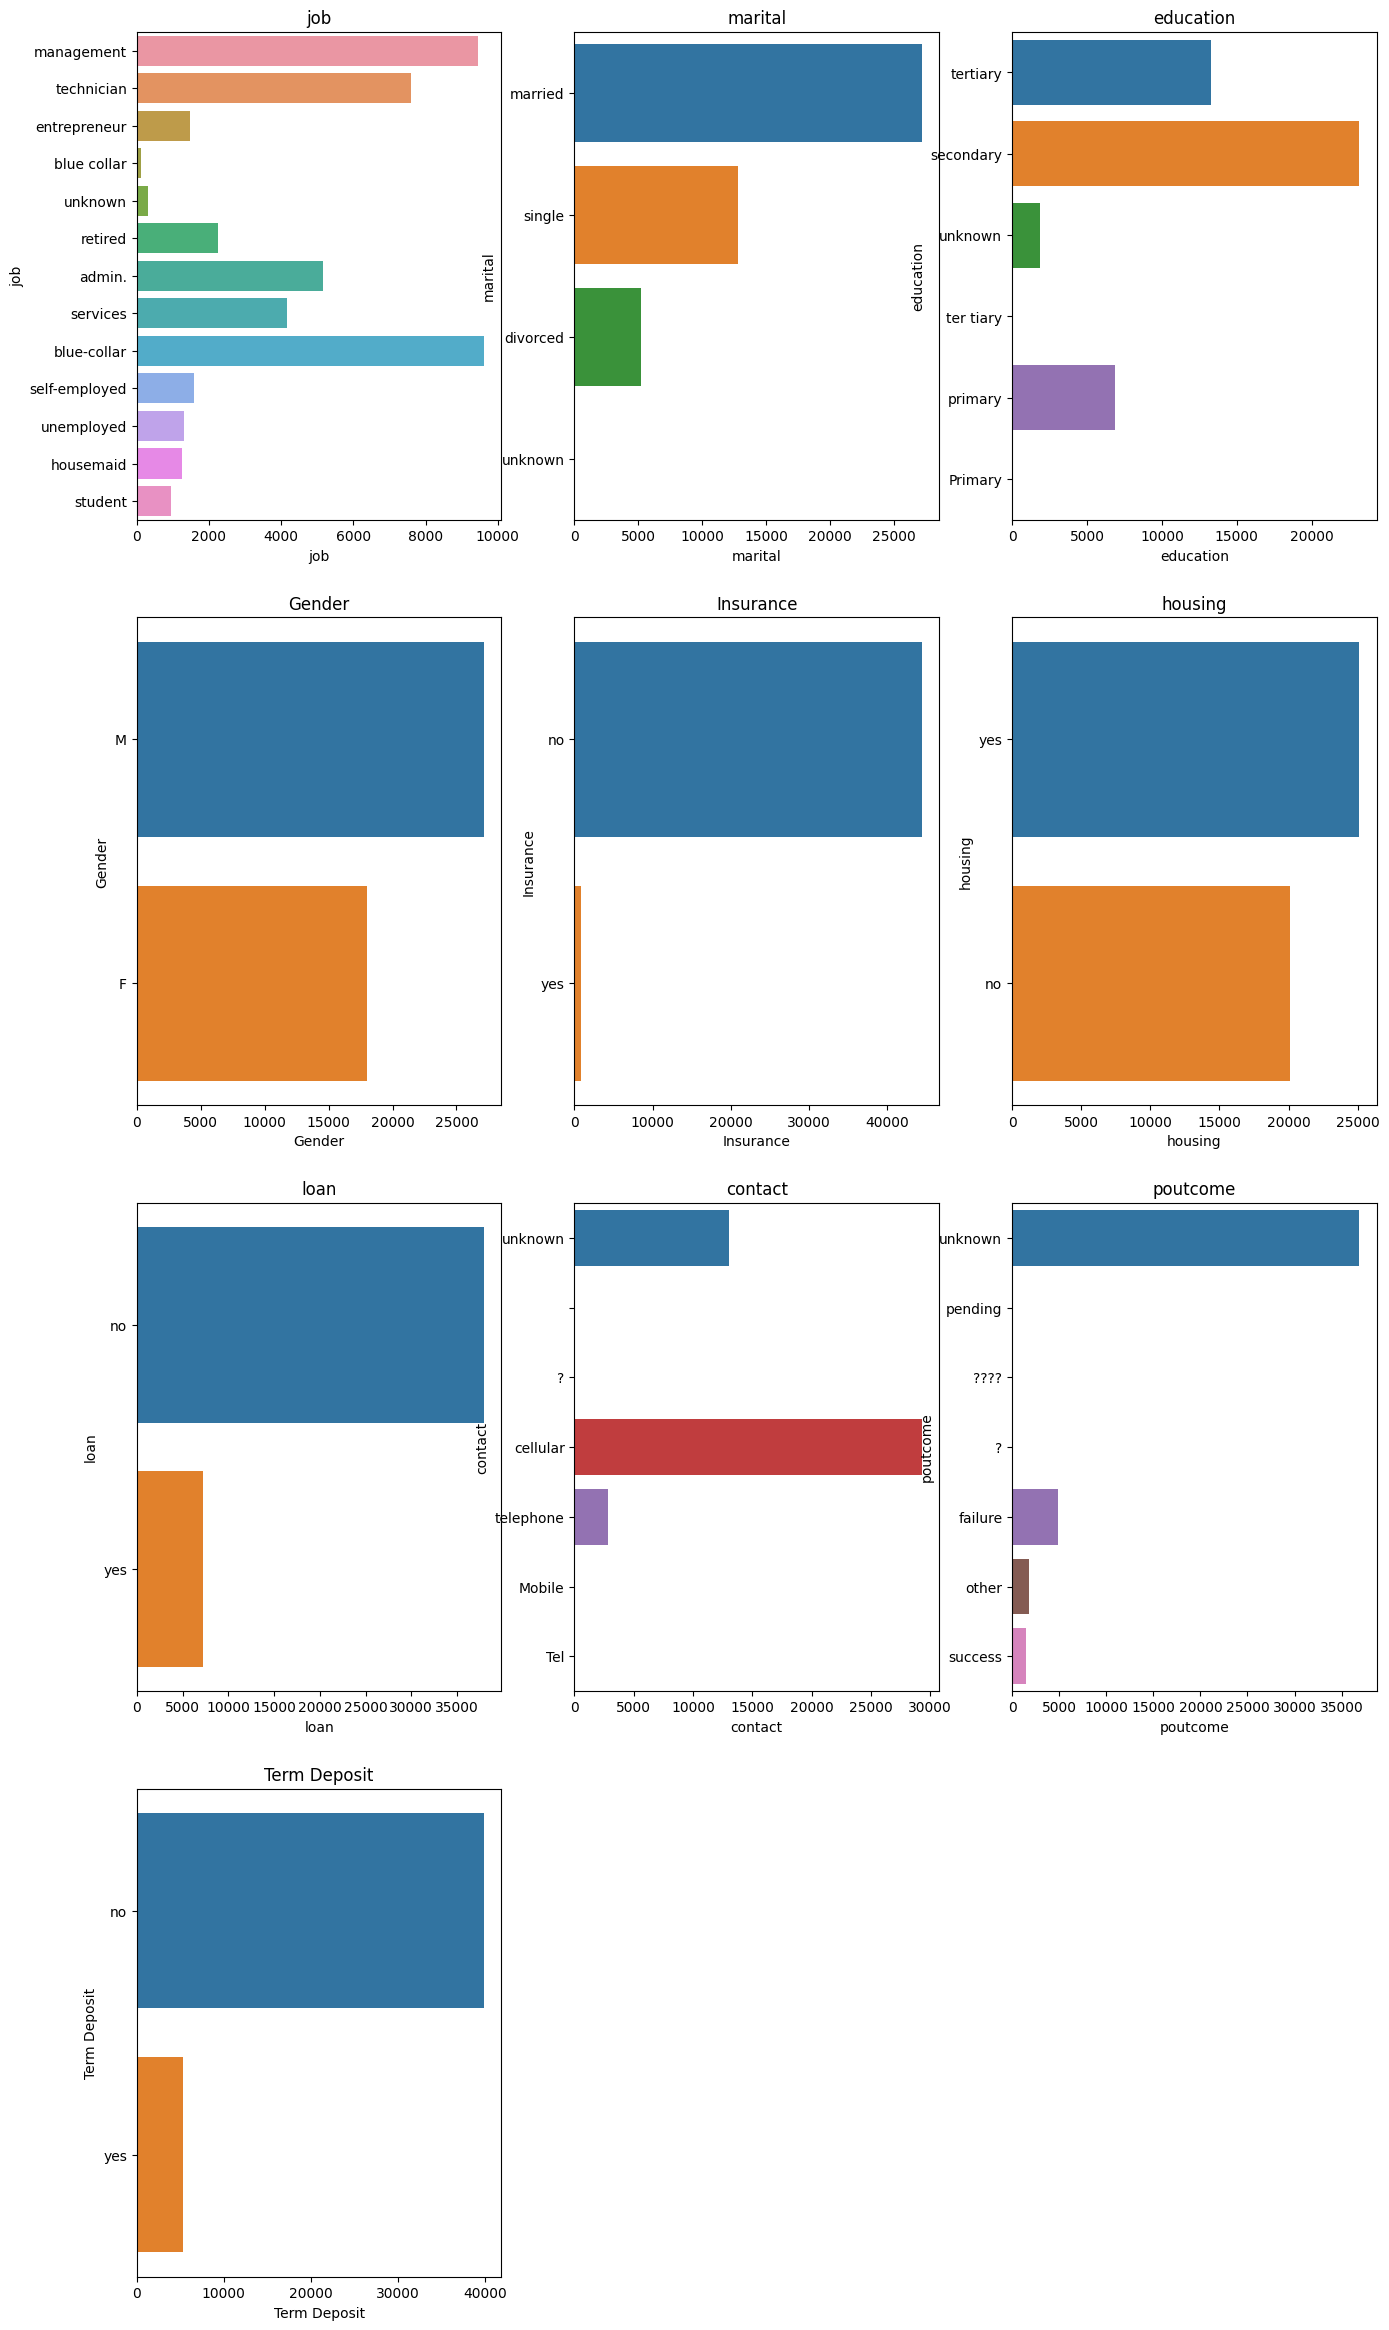

In [28]:
#Find Categorical Feature Distribution

#check count based on categorical features
plt.figure(figsize=(16,90), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data2)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Inference**
-  Here in "poutcome" and "contact" contains wrongly formatted data.
-  In the columns, "education" and "contact" there are values with same meaning but given with spelling mistakes and so wronlgly classified.


In [29]:
# Handling wrongly formatted data in contact column

data2['contact'] = data2['contact'].str.replace(' ', 'unknown', regex=False)
data2['contact'] = data2['contact'].str.replace('?', 'unknown', regex=False)

In [30]:
# Convert all values to lowercase for case-insensitive comparison
data2['contact'] = data2['contact'].str.lower()

In [31]:
# Create a dictionary to map correct values to their lowercase versions
contact_mapping = {
    'telephone': 'telephone',
    'cellular': 'mobile',
    'tel': 'telephone',
    'Mobile': 'mobile',
    'unknown': 'unknown'
}

# Apply the mapping to correct the values
data2['contact'] = data2['contact'].replace(contact_mapping)

In [32]:
## Handling wrongly formatted data in poutcome column

data2['poutcome'] = data2['poutcome'].str.replace('????', '?', regex=False)

In [33]:
data2['poutcome'] = data2['poutcome'].str.replace('?', 'unknown', regex=False)

In [34]:
# Handling wrongly formatted data in education column

# Convert all values to lowercase for case-insensitive comparison
data2['education'] = data2['education'].str.lower()

In [35]:
# Create a dictionary to map correct values to their lowercase versions
education_mapping = {
    'primary': 'primary',
    'Primary': 'primary',
    'tertiary': 'tertiary',
    'ter tiary': 'tertiary',
    'unknown': 'unknown'
}

# Apply the mapping to correct the values
data2['education'] = data2['education'].replace(education_mapping)

In [36]:
data2.tail()

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
45206,46207,51,technician,married,tertiary,2229818.0,M,no,825.0,no,no,mobile,0.0,0,-1,0,unknown,yes,152.0
45207,46208,121,retired,divorced,primary,2783556.0,M,no,1729.0,no,no,mobile,0.0,0,-1,0,unknown,yes,334.0
45208,46209,72,retired,married,secondary,443512.0,M,no,5715.0,no,no,mobile,1127.0,5,184,3,success,yes,381.0
45209,46210,57,blue-collar,married,secondary,4193684.0,F,no,668.0,no,no,telephone,0.0,0,-1,0,unknown,no,211.0
45210,46211,37,entrepreneur,married,secondary,3617935.0,M,no,2971.0,no,no,mobile,361.0,2,188,11,other,no,331.0


**Inference :  All the misclassified and wrongly formatted data are corrected.**

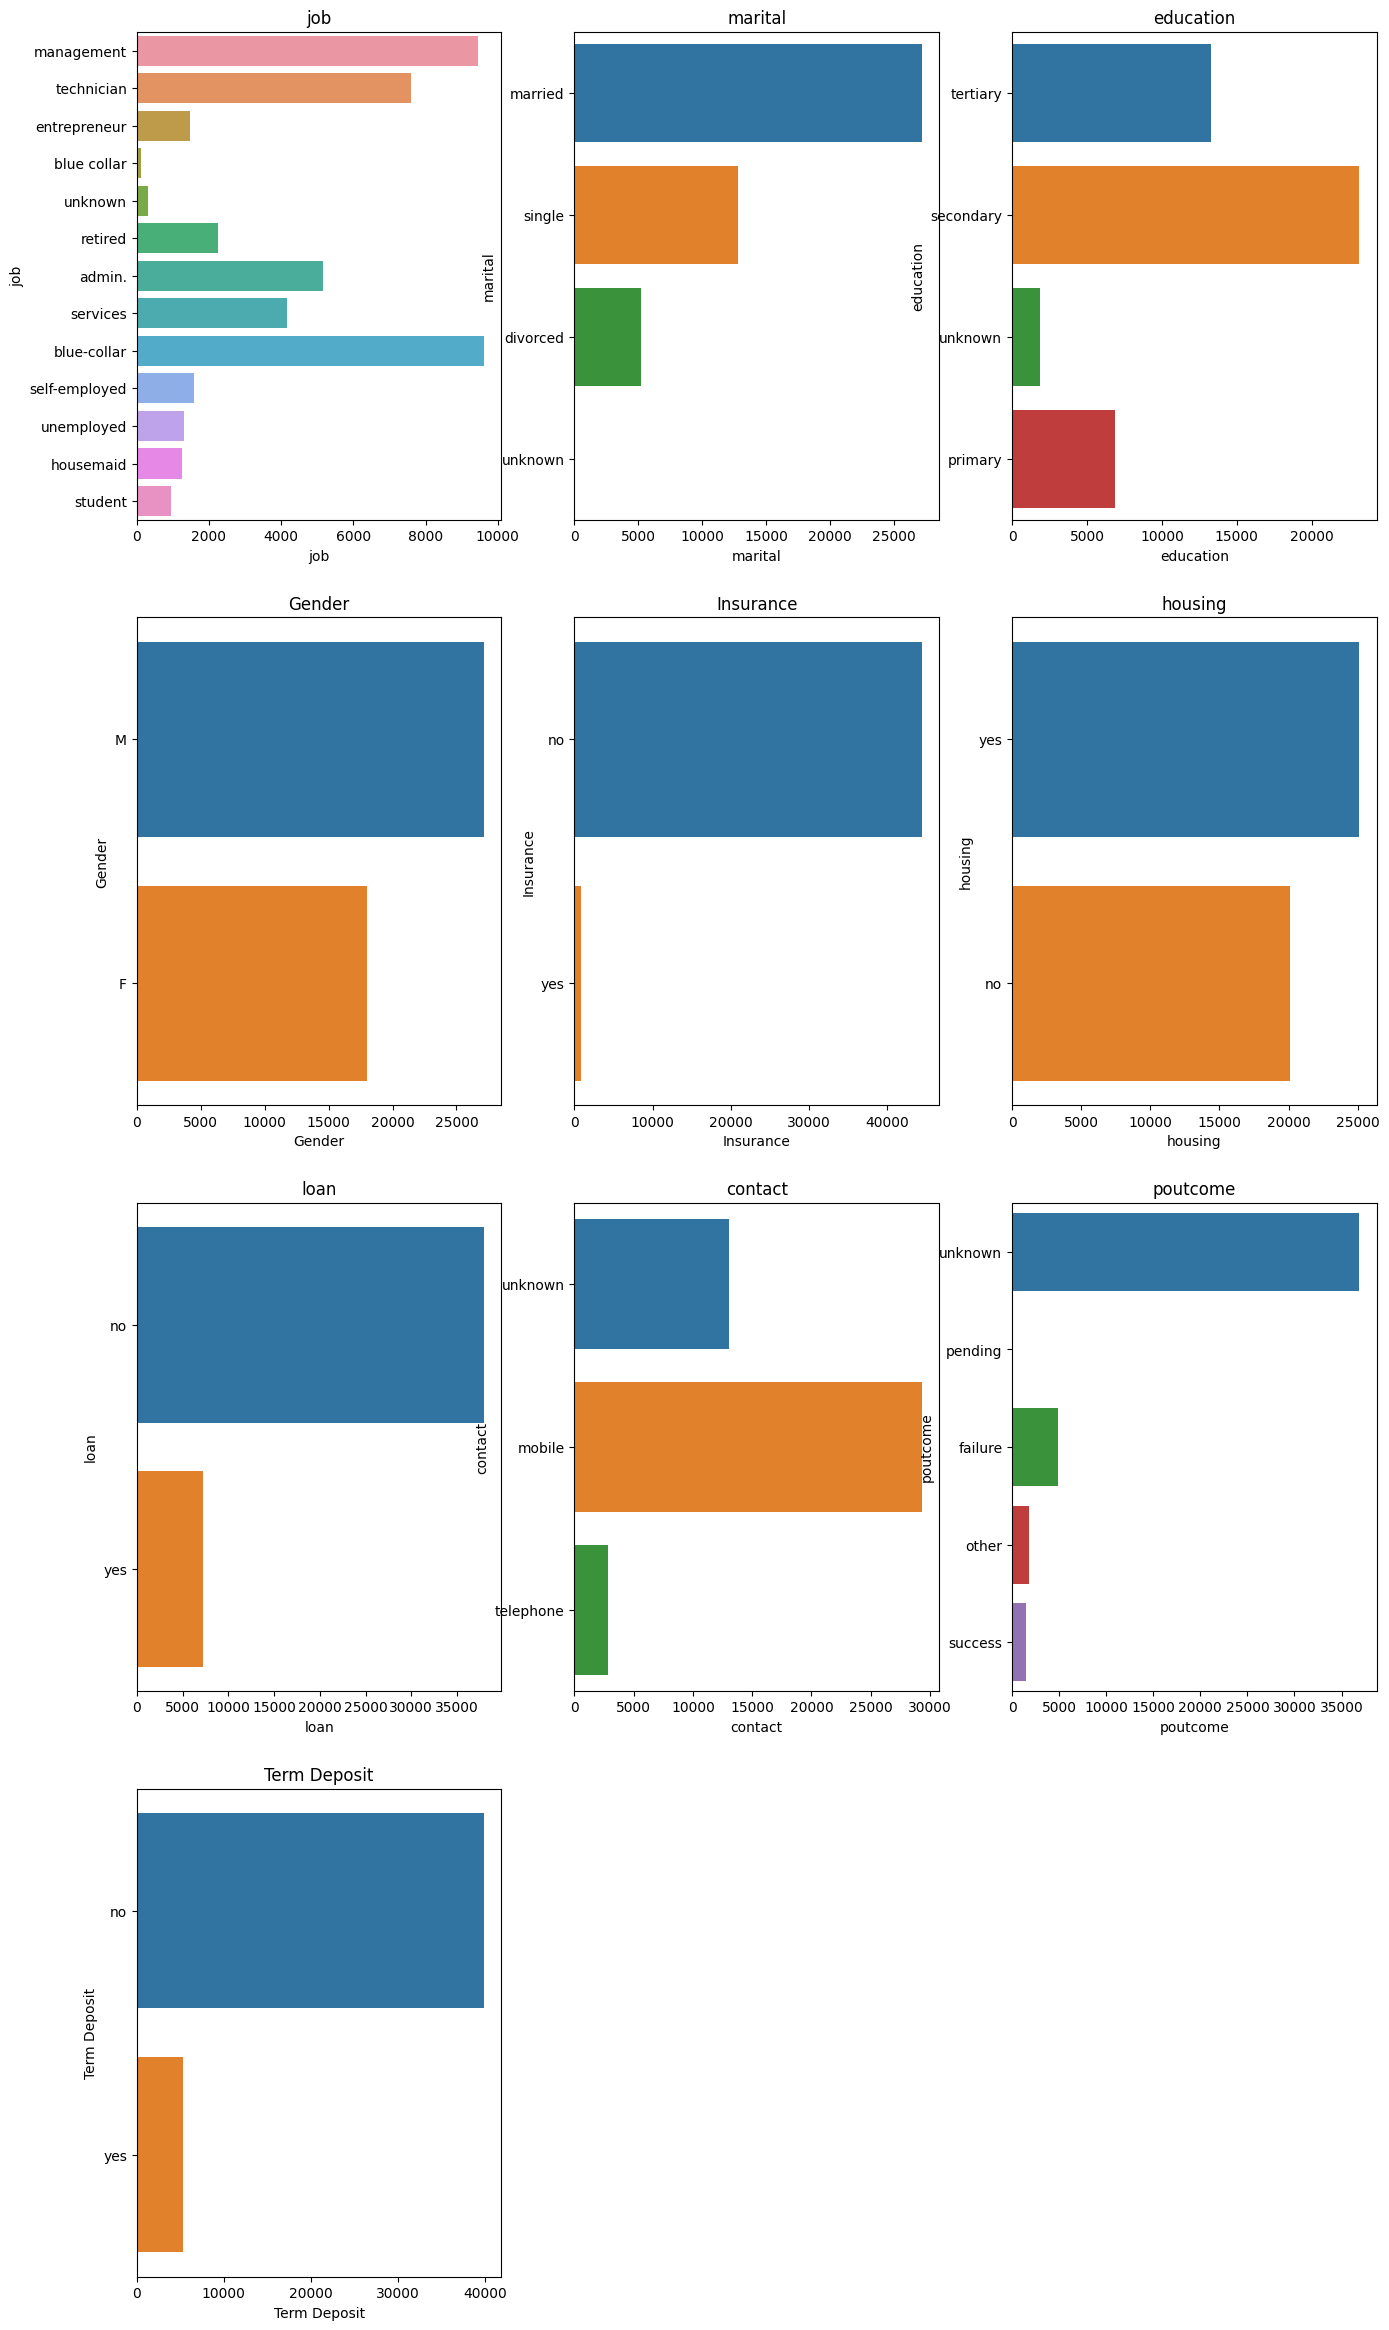

In [37]:
#Categorical Feature Distribution

#check count based on categorical features
plt.figure(figsize=(16,90), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data2)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Inference :**
- Most of the customers who have an account on this bank are having jobs management, blue collar, technician etc.
- Customers who are married are the ones having more account on the bank.
- When it comes to education, customers with a secondary education are having more accounts than others.
- There are more male customers than female customers.
- People with no insurances and no personal loans are more.
- There are more customers who already have housing loan.
- The contact method people have chosen is through mobile.
- Success rate of previous campaign outcome seems to be very less.
- Also large part of customers haven't taken fixed deposit.

#### **Explore the Numerical Features**


In [38]:
# list of numerical variables

numerical_features = [feature for feature in data2.columns if ((data2[feature].dtypes != 'O') & (feature not in ['Term Deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data2[numerical_features].head()

Number of numerical variables:  9


,Customer_number,age,Annual Income,balance,duration,campaign,last_contact_day,previous,Count_Txn
0,1001,58,839368.0,2143.0,261.0,1,2,0,351.0
1,1002,44,1452858.0,29.0,151.0,1,2,0,326.0
2,1003,33,4851383.0,2.0,76.0,1,2,0,422.0
3,1004,47,3207754.0,1506.0,92.0,1,2,0,113.0
4,1005,33,2562322.0,1.0,198.0,1,2,0,342.0


There are 9 numerical features

In [39]:
 #Find Discrete Numerical Features

discrete_feature=[feature for feature in numerical_features if len(data2[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [40]:
# Find Continous Numerical Features

continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Term Deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 9


<ipython-input-41-8ed4e00ab1b0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[continuous_feature])
<ipython-input-41-8ed4e00ab1b0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[continuous_feature])
<ipython-input-41-8ed4e00ab1b0>:8: UserWarning: 

`distplot` is a deprecated fun

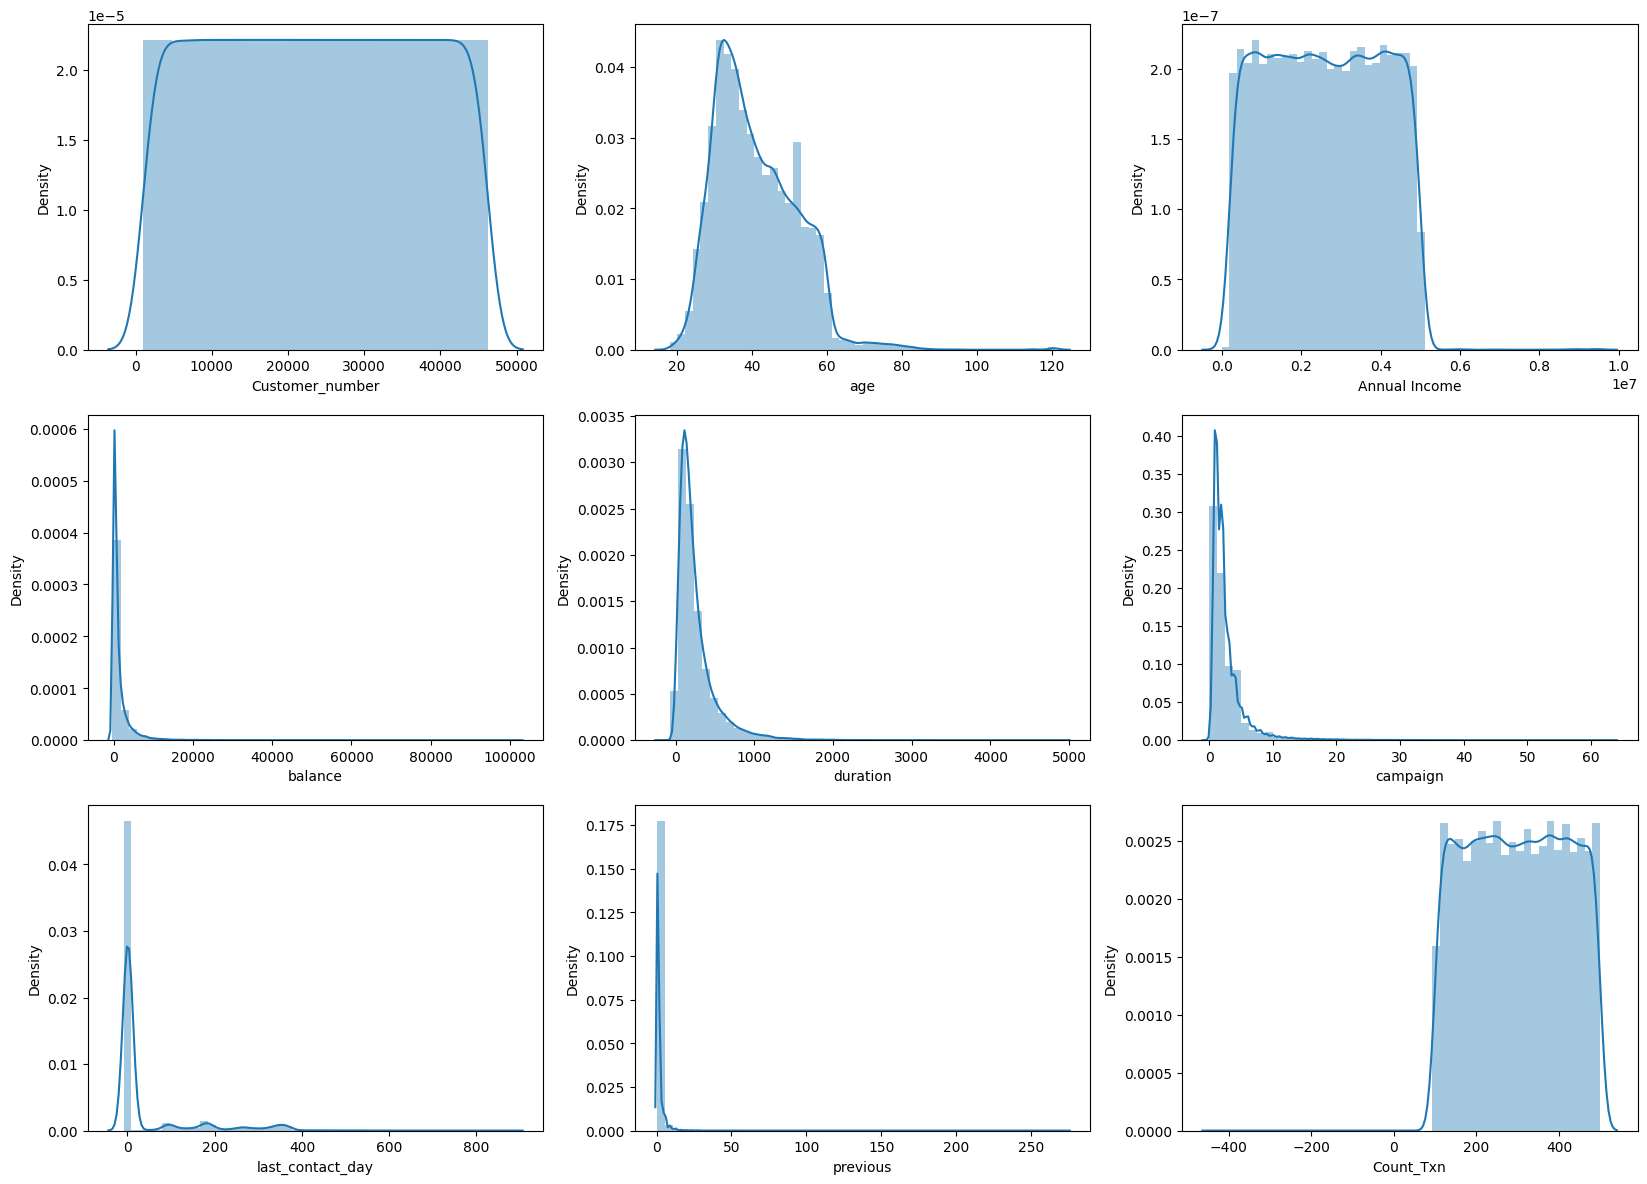

In [41]:
# Distribution of Continous Numerical Features

#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data2[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Inference:**
- it seems every features are right skewed and seems to be have some outliers.
- But the feature "Count_Txn" is left skewed.

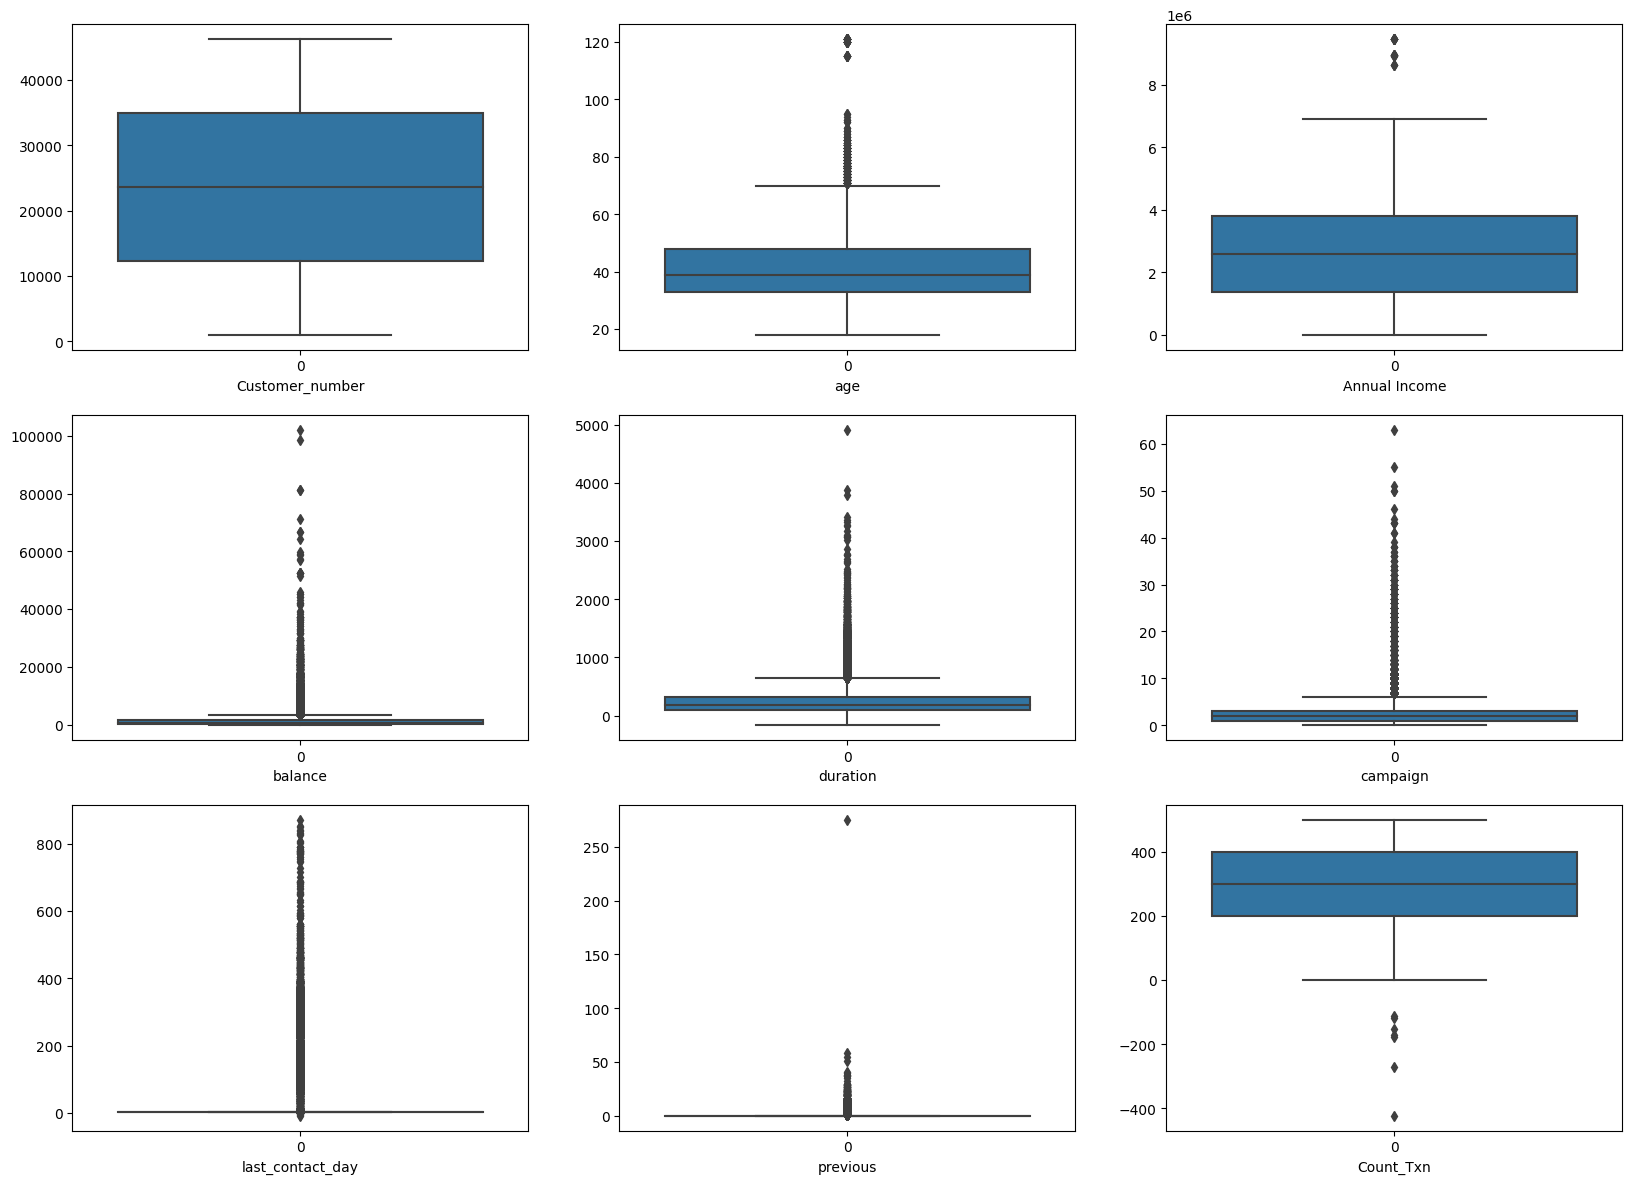

In [42]:
 #Find Outliers in numerical features

#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data2[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()


**Inference** :
- Age, Annual Income, balance, duration, campaign, last_contact_day, previous and Count_Txn has some outliers
- If we remove outliers from some features like last_contact_day, then the whole feature gets eliminated.

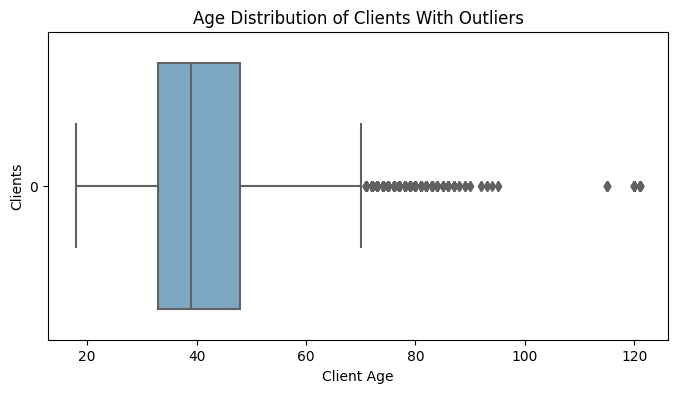

The first quartile is 33.0. 
The third quartile is 48.0. 
The IQR is 15.0.
The mean is 40.98.
The standard deviation is 10.84.
The median is 39.0.


In [43]:
# Boxplot of age as another way of showing distribution
fig = plt.figure(figsize = (8,4))
plt.title ('Age Distribution of Clients With Outliers')
plt.xlabel('Client Age')
plt.ylabel('Clients')

sns.boxplot(data=data2['age'], palette="PuBu", orient='h')
plt.show()

# Computing IQR
Q1 = data2['age'].quantile(0.25)
Q3 = data2['age'].quantile(0.75)
IQR = Q3-Q1

# Computing Summary Statistics
mean_1 = round(data2['age'].mean(),2)
std_1 = round(data2['age'].std(),2)
median_1 = round(data2['age'].median(),2)
print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%IQR)
print('The mean is %s.'%mean_1)
print('The standard deviation is %s.'%std_1)
print('The median is %s.'%median_1)

In [44]:
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

outliers_data2 = data2.loc[(data2['age'] < lower_bound) | (data2['age'] > upper_bound)]
average_age = round(data2.age.mean(), 2)
print('The average of age in the original data frame is %s.' % average_age)

average_age_outliers_data2 = round(outliers_data2.age.mean(),2)
print('The average of age of outliers is %s.' % average_age_outliers_data2)

The average of age in the original data frame is 40.98.
The average of age of outliers is 80.52.


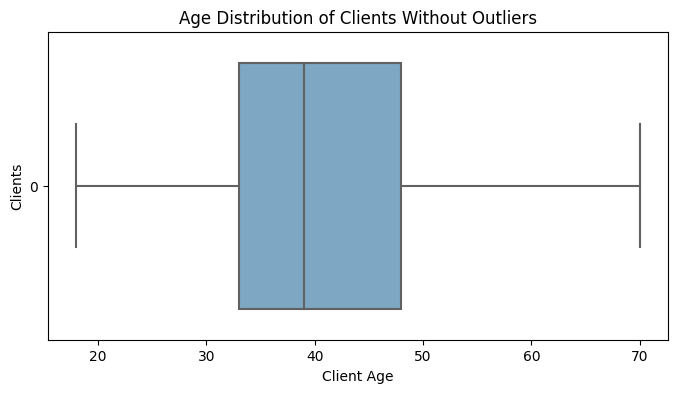

In [45]:
# Boxplot of age without outliers as another way of showing distribution
fig = plt.figure(figsize = (8,4))
plt.title ('Age Distribution of Clients Without Outliers')
plt.xlabel('Client Age')
plt.ylabel('Clients')
sns.boxplot(data=data2['age'], palette="PuBu", orient='h', showfliers = False)
plt.show()

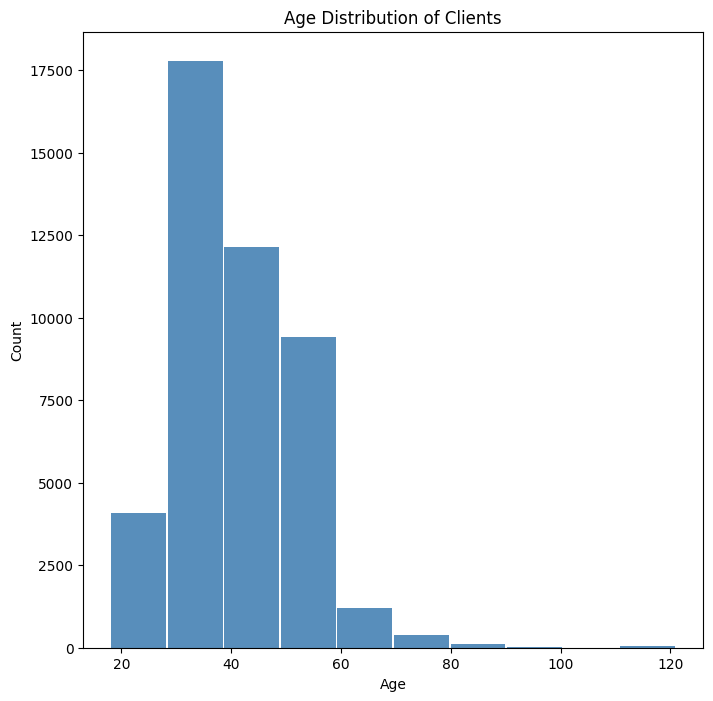

The information below shows the mode for the age variable:


0    32
Name: age, dtype: int64

In [46]:
# Plotting a histogram to show distribution
fig = plt.figure(figsize = (8,8))
plt.hist(data2['age'], bins=10, color='steelblue', alpha=0.9, rwidth=.97)
plt.title ('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


print('The information below shows the mode for the age variable:')
data2.loc[:,'age'].mode()

###**1. Income Insights:**

- **How many customers have no annual income? Plot and present the data distribution
of these customers.**

In [47]:
# Check the number of customers with no annual income
no_income_customers = data2[data2['Annual Income'] == 0]
num_no_income_customers = len(no_income_customers)
num_no_income_customers

18

**Inference : There are 18 customers with no income.**

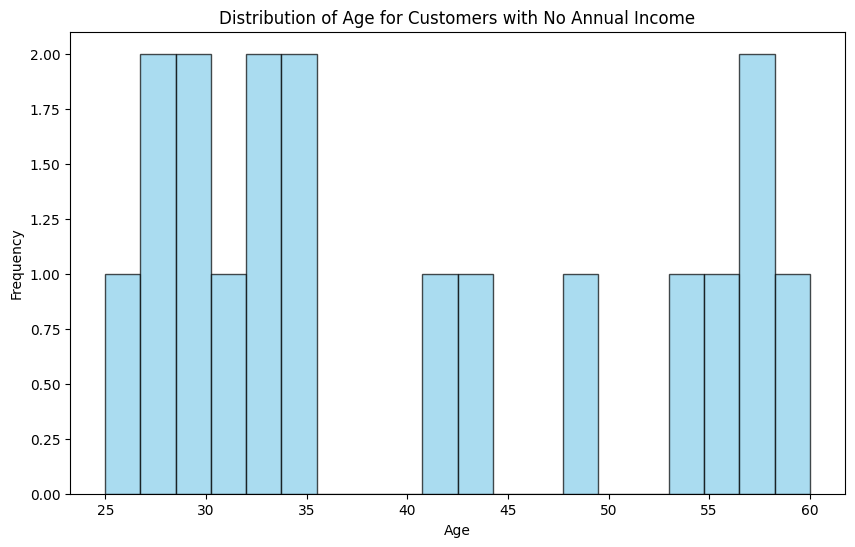

In [48]:
# Plot the data distribution for customers with no annual income
plt.figure(figsize=(10, 6))
plt.hist(no_income_customers['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age for Customers with No Annual Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Inference: Most of the customers who have zero annual income is between age group 25-35.**

###**2. Loan-less Customers Profile:**

- **Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?**

In [49]:
loan_less_customers = data2.loc[(data2['housing'] == 'no') & (data2['loan'] == 'no')]
print("Number of customers with No loan: ",len(loan_less_customers))

Number of customers with No loan:  17202


There are 17204 customers who don't have any type of loan.

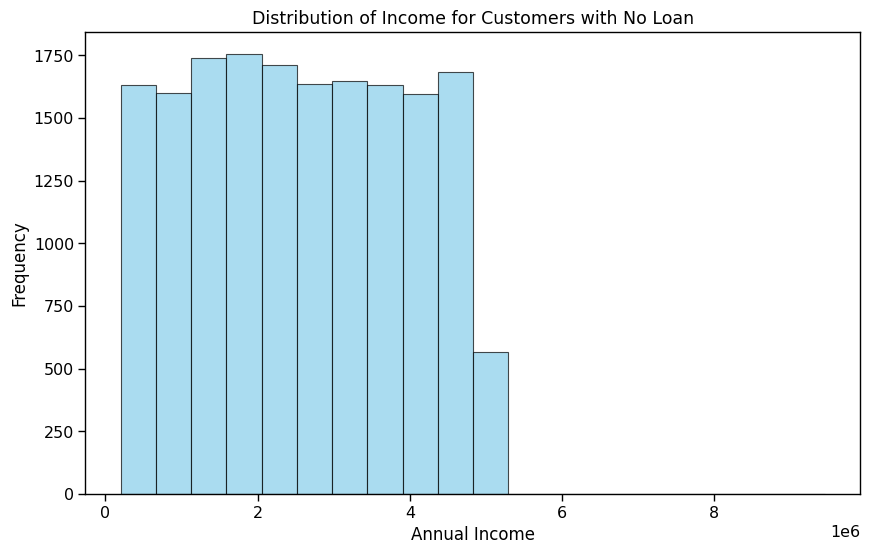

In [ ]:
# Plot the distribution of income for customers with no loan
plt.figure(figsize=(10, 6))
plt.hist(loan_less_customers['Annual Income'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Income for Customers with No Loan')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

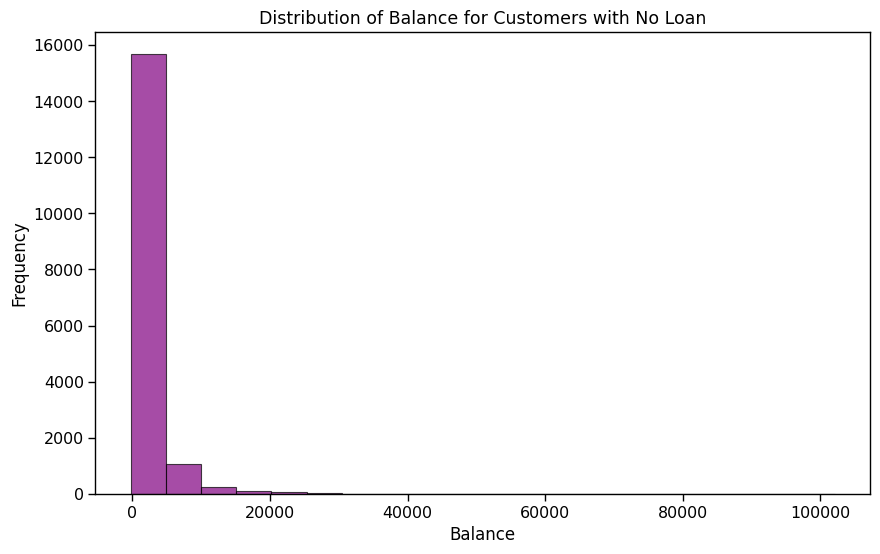

In [ ]:
# Plot the distribution of balance for customers with no loan
plt.figure(figsize=(10, 6))
#sns.histplot(data=loan_less_customers['balance'], bins=20, kde=True, color='purple')
plt.hist(loan_less_customers['balance'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Balance for Customers with No Loan')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

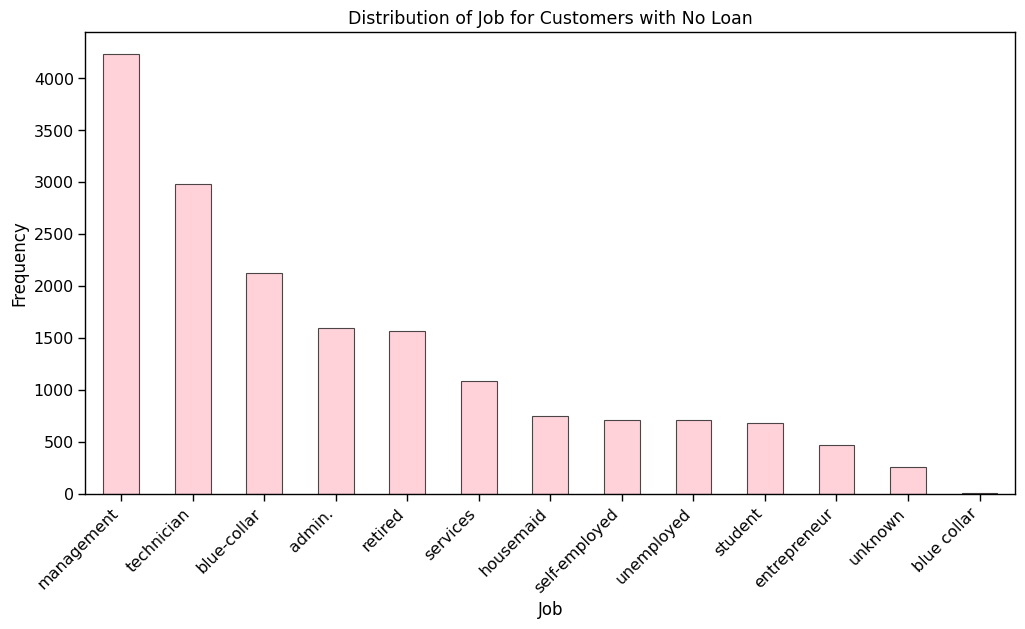

In [ ]:
# Plot the distribution of job for customers with no loan
plt.figure(figsize=(12, 6))
loan_less_customers['job'].value_counts().plot(kind='bar', color='Pink', edgecolor='black', alpha=0.7)
plt.title('Distribution of Job for Customers with No Loan')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**INFERENCE:**

- 17204 customers don’t have any type of loan.
- Distribution of  Income for customers with no loan  ranges between 0 - 6,00,000.
- Customers with no loan have very little balance
- Customers who have ‘management’, or ‘technician’ have no loan.



###**3. Loan and Insurance Analysis:**

- **Calculate the percentage of customers with a loan who have taken out insurance. Visualize this data and discuss potential implications.**

In [ ]:
loan_customers = data2[(data2['loan'] == 'yes') | (data2['housing'] == 'yes')]
print("customers who had taken loan: ",len(loan_customers))

customers who had taken loan:  28000


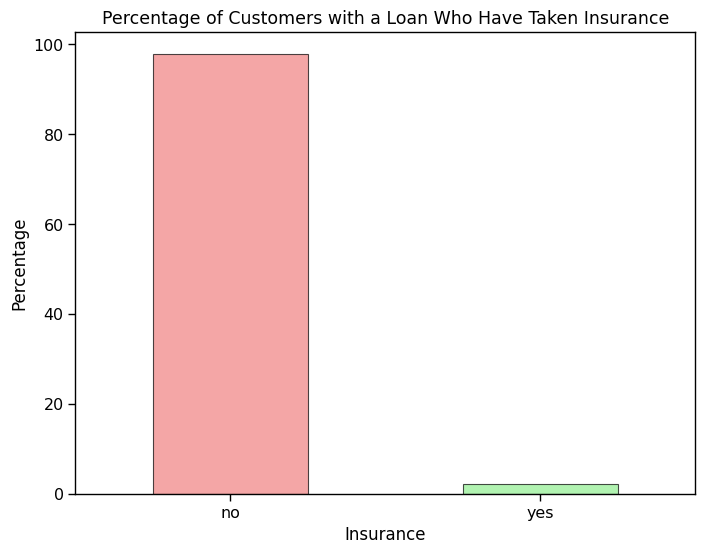

Percentage of customers with a loan who have taken insurance:
no     97.85
yes     2.15
Name: Insurance, dtype: float64


In [ ]:
#Calculate the percentage of customers with a loan who have taken insurance
insurance_percentage = (loan_customers['Insurance'].value_counts(normalize=True) * 100).round(2)

# Plot the data
plt.figure(figsize=(8, 6))
insurance_percentage.plot(kind='bar', color=['lightcoral', 'lightgreen'], edgecolor='black', alpha=0.7)
plt.title('Percentage of Customers with a Loan Who Have Taken Insurance')
plt.xlabel('Insurance')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Display the percentage values
print("Percentage of customers with a loan who have taken insurance:")
print(insurance_percentage)

**Inference:**
- Percentage of customers with a loan who have taken an insurance is 2.15% only.
- Percentage of customers with a loan who haven't taken an insurance is 97.85%.

### **4.Communication Strategy Insights:**

- **Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.**

In [ ]:
# Filter rows where the outcome is 'yes' for term deposit subscription
subscribed_customers = data2[data2['Term Deposit'] == 'yes']
subscribed_customers

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
83,1084,59,admin.,unknown,secondary,1368654.0,F,no,2343.0,yes,no,unknown,1042.0,1,1,0,unknown,yes,141.0
86,1087,56,admin.,married,secondary,3604898.0,M,no,45.0,no,no,unknown,1467.0,1,1,0,unknown,yes,399.0
87,1088,41,technician,married,secondary,201417.0,F,no,1270.0,yes,no,unknown,1389.0,1,1,0,unknown,yes,468.0
129,1130,55,services,married,secondary,4136180.0,M,no,2476.0,yes,no,unknown,579.0,1,1,0,unknown,yes,241.0
168,1169,54,admin.,married,tertiary,1382727.0,M,no,184.0,no,no,unknown,673.0,2,1,0,unknown,yes,356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,46205,73,retired,married,secondary,256313.0,M,no,2850.0,no,no,mobile,300.0,1,40,8,failure,yes,361.0
45205,46206,25,technician,single,secondary,906175.0,F,no,505.0,no,yes,mobile,0.0,0,-1,0,unknown,yes,459.0
45206,46207,51,technician,married,tertiary,2229818.0,M,no,825.0,no,no,mobile,0.0,0,-1,0,unknown,yes,152.0
45207,46208,121,retired,divorced,primary,2783556.0,M,no,1729.0,no,no,mobile,0.0,0,-1,0,unknown,yes,334.0


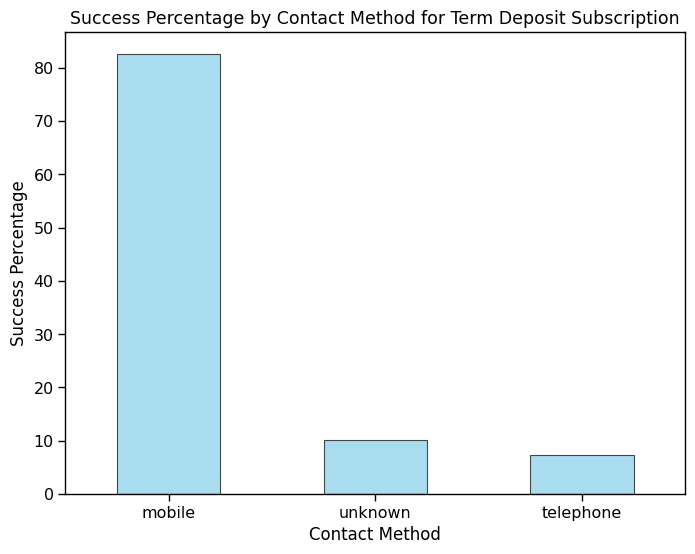

Success Percentage by Contact Method:
mobile       82.602118
unknown      10.041604
telephone     7.356278
Name: contact, dtype: float64


In [ ]:
# Group by 'contact' and calculate the success percentage
contact_success_percentage = subscribed_customers['contact'].value_counts(normalize=True) * 100

# Plot the success percentage for each contact method
plt.figure(figsize=(8, 6))
contact_success_percentage.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Success Percentage by Contact Method for Term Deposit Subscription')
plt.xlabel('Contact Method')
plt.ylabel('Success Percentage')
plt.xticks(rotation=0)
plt.show()

# Display the success percentage values
print("Success Percentage by Contact Method:")
print(contact_success_percentage)


**Inference:**
- Success Percentage by Contact Method of mobile is 82.58%, unknown is 10.058612 and telephone is 7.354888.
- So customers who have taken subscrioption on term deposit are contacted throuugh mobile.

###**5.Age and Home Loans:**

- **Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.**

In [ ]:
# Filter rows where 'housing' column is 'yes' for home loans
home_loan_customers = data2[data2['housing'] == 'yes']
home_loan_customers

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368.0,M,no,2143.0,yes,no,unknown,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858.0,M,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,unknown,4851383.0,F,no,2.0,yes,yes,unknown,76.0,1,2,0,unknown,no,422.0
3,1004,47,blue collar,married,unknown,3207754.0,F,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
5,1006,35,management,married,tertiary,3960603.0,M,no,231.0,yes,no,unknown,139.0,1,2,0,unknown,no,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,46192,75,retired,divorced,tertiary,4765368.0,M,no,3810.0,yes,no,mobile,262.0,1,183,1,failure,yes,164.0
45194,46195,59,management,married,tertiary,1721166.0,F,no,138.0,yes,yes,mobile,162.0,2,187,5,failure,no,496.0
45197,46198,36,management,single,secondary,4012927.0,M,no,1511.0,yes,no,mobile,270.0,1,1,0,unknown,yes,425.0
45199,46200,34,blue-collar,single,secondary,255337.0,M,no,1475.0,yes,no,mobile,1166.0,3,530,12,other,no,487.0


<ipython-input-221-961e5aa0ce1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_loan_customers['age_group'] = pd.cut(home_loan_customers['age'], bins=bins, labels=labels, right=False)


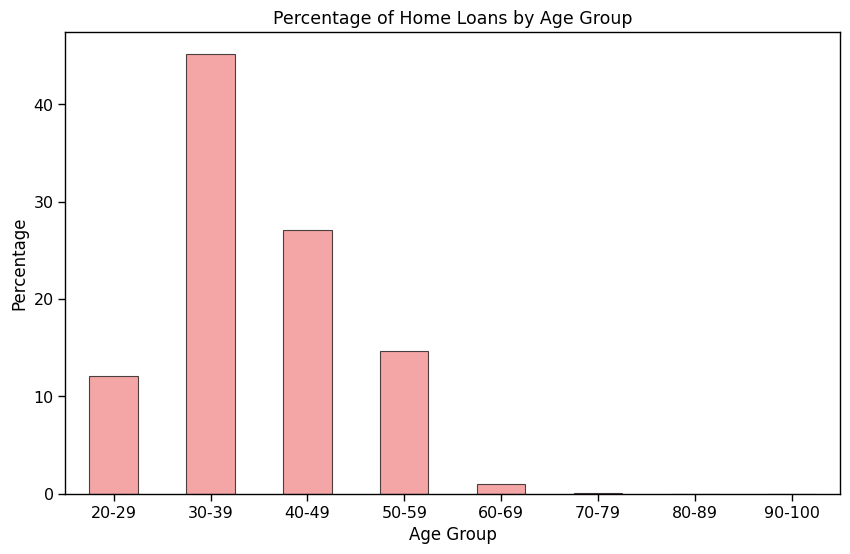

Percentage of Home Loans by Age Group:
30-39     45.163217
40-49     27.062102
50-59     14.641720
20-29     12.082006
60-69      1.007166
70-79      0.043790
80-89      0.000000
90-100     0.000000
Name: age_group, dtype: float64


In [ ]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
home_loan_customers['age_group'] = pd.cut(home_loan_customers['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of home loans in each age group
age_group_percentage = home_loan_customers['age_group'].value_counts(normalize=True) * 100

# Plot the percentage of home loans in each age group
plt.figure(figsize=(10, 6))
age_group_percentage.sort_index().plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Display the percentage values
print("Percentage of Home Loans by Age Group:")
print(age_group_percentage)


**Inference:**
- Percentage of Home Loans by Age Group:
  - 30-39     45.170534
  - 40-49     27.058543
  - 50-59     14.641621
  - 20-29     12.078641
  - 60-69      1.006885
  - 70-79      0.043778
  - 80-89      0.000000
  - 90-100     0.000000
- Here the age group of customers that have highest percentage of home loans are 30-39.
-Customers that have the lowest percentage of home loans are of age groups  90-100

###**6. Income and Age Relationship:**

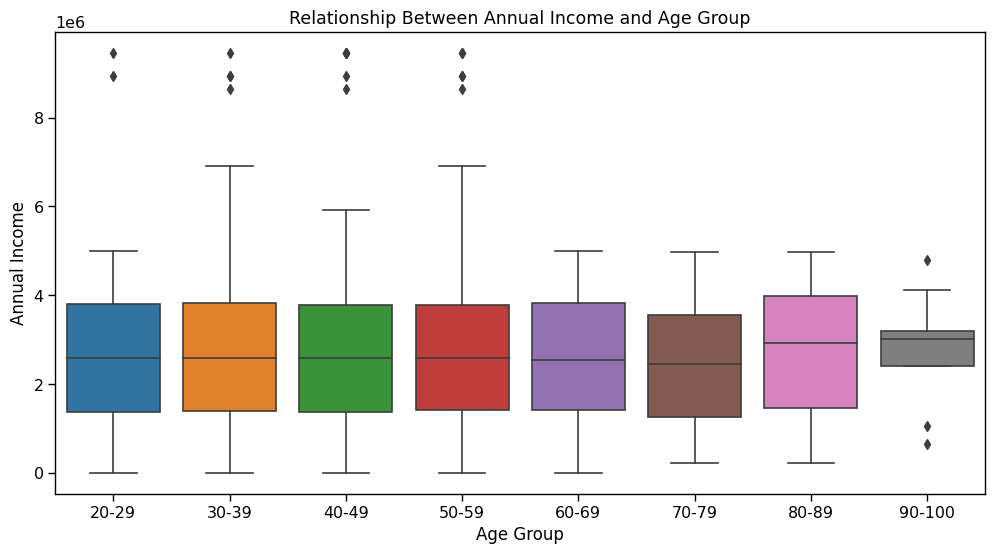

Statistical Summary of Annual Income by Age Group:
             count          mean           std       min         25%  \
age_group                                                              
20-29       5226.0  2.588729e+06  1.412082e+06       0.0  1367210.25   
30-39      18082.0  2.598720e+06  1.392446e+06       0.0  1393011.00   
40-49      11654.0  2.590804e+06  1.396837e+06       0.0  1371884.00   
50-59       8409.0  2.601659e+06  1.387104e+06       0.0  1408455.00   
60-69       1216.0  2.597023e+06  1.373211e+06       0.0  1418881.25   
70-79        398.0  2.479126e+06  1.355934e+06  222287.0  1269299.00   
80-89        121.0  2.745452e+06  1.402993e+06  231194.0  1456605.00   
90-100         9.0  2.793918e+06  1.318708e+06  641976.0  2400327.00   

                 50%         75%        max  
age_group                                    
20-29      2588343.0  3804327.00  9456339.0  
30-39      2582278.0  3820439.00  9455698.0  
40-49      2596622.0  3785338.50  9458762.0 

In [ ]:

# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
data2['age_group'] = pd.cut(data2['age'], bins=bins, labels=labels, right=False)

# Plot the relationship between annual income and age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='Annual Income', data=data2)
plt.title('Relationship Between Annual Income and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.show()

# Display statistical summary
summary_stats = data2.groupby('age_group')['Annual Income'].describe()
print("Statistical Summary of Annual Income by Age Group:")
print(summary_stats)


**Inference:**
- The mean annual income tends to increase with age, with the highest mean income observed in the "80-89" age group.
- Provides a comprehensive view of the distribution and central tendency of annual income within each age group, aiding in understanding income patterns and potential trends across different age brackets.
- The "20-29" age group has the least mean annual income among the specified age groups.

##**Modeling:**

####**1. Term Deposit and Related Variables:**

**Identify variables strongly related to Term Deposit. Discuss your approach when the variable is categorical. Which tests or metrics will you employ?**

**For numeric variables**


In [53]:
data2['Term Deposit'] = data2['Term Deposit'].str.lower()

In [54]:
data2['term deposit'] = data2['Term Deposit'].map(dict(yes=1, no=0))
data2['p_outcome'] = data2.poutcome.map(dict(unknown=0, other=1, failure=2, success=3, pending=4))

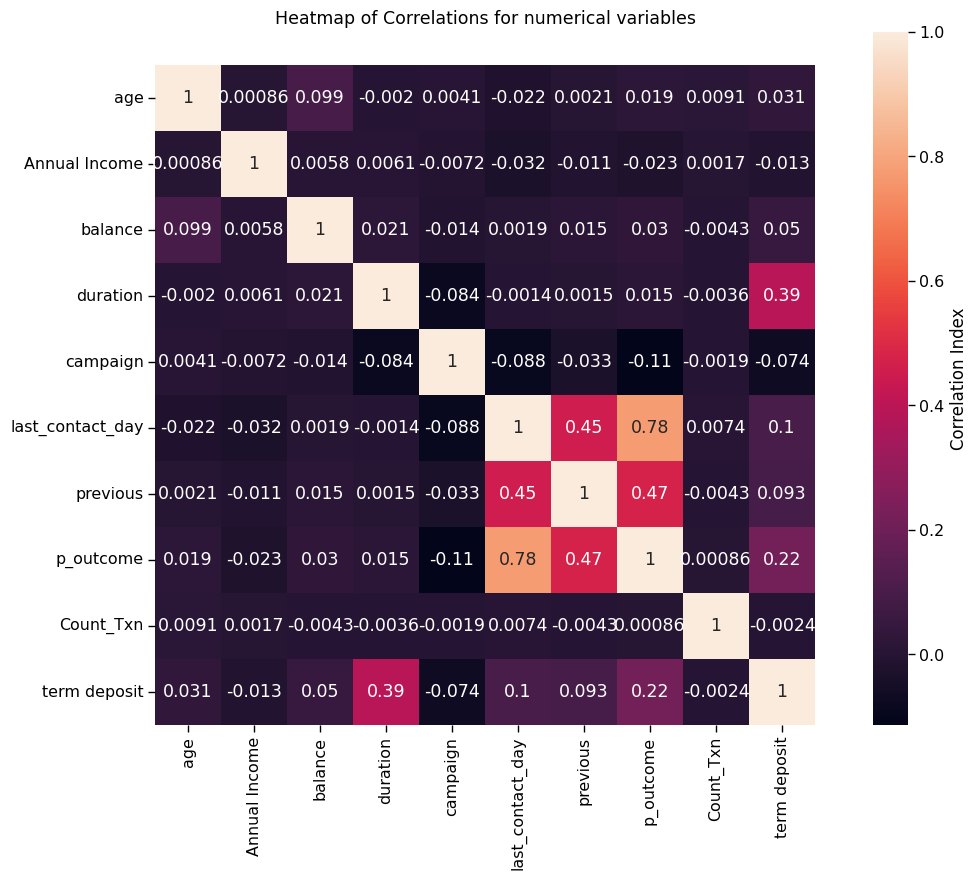

In [ ]:
# Examining the correlations between variables using a heat map
heatmap = data2[['age','Annual Income','balance','duration','campaign','last_contact_day','previous','p_outcome','Count_Txn','term deposit']]
sns.set_context("paper", rc={"axes.labelsize":12}, font_scale = 1.3)
correlations = heatmap.corr()
plt.figure(figsize = (15,9))
ax = sns.heatmap(correlations[['age','Annual Income','balance','duration','campaign','last_contact_day','previous','p_outcome','Count_Txn','term deposit']], \
                 annot = True, square = True, cbar_kws={'label': 'Correlation Index'})
ax.set_title('Heatmap of Correlations for numerical variables')
ax.set_ylim(len(correlations), -0.5)
plt.show()

**Inference:**
-  Here when considered the numerical features, duration which represents the is moderately correlated to target variable by 0.39.This is a moderate positive correlation.
- The second highest correlation is that of Outcome of the previous marketing campaign (poutcome) to deposit (0.22). This is a low positive correlation.
- Lastly, a low negative correlation (-0.11) is seen between campaign and poutcome.

**For categorical variables**

In [ ]:
from scipy.stats import chi2_contingency

# Include all relevant categorical variables
categorical_vars = ['job', 'marital', 'education', 'contact', 'poutcome', 'Term Deposit']


# Calculate Cramér's V for each pair of categorical variables
cramers_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(categorical_data[var1], categorical_data[var2])

            # Check for zero variance
            if contingency_table.apply(np.sum).nunique() > 1 and contingency_table.T.apply(np.sum).nunique() > 1:
                chi2_stat, _, _, _ = chi2_contingency(contingency_table)
                cramers_value = np.sqrt(chi2_stat / (categorical_data.shape[0] * (min(contingency_table.shape) - 1)))
                cramers_matrix.at[var1, var2] = cramers_value
            else:
                cramers_matrix.at[var1, var2] = 0  # Set to 0 for zero variance cases

# Fill NaN values with 0 for better interpretation
cramers_matrix.fillna(0, inplace=True)

# Display feature importance for categorical variables
print("Cramér's V Matrix:")
print(cramers_matrix)


Cramér's V Matrix:
                   job   marital  education   contact  poutcome  Term Deposit
job           0.000000  0.174012   0.457596  0.156887  0.058510      0.136154
marital       0.174012  0.000000   0.099880  0.051049  0.028705      0.067588
education     0.457596  0.099880   0.000000  0.122626  0.037189      0.072588
contact       0.156887  0.051049   0.122626  0.000000  0.210470      0.151032
poutcome      0.058510  0.028705   0.037189  0.210470  0.000000      0.311783
Term Deposit  0.136154  0.067588   0.072588  0.151032  0.311783      0.000000


**Cramér's V Matrix:**
- Values closer to 0: Weak or no association.
- Values closer to 1: Strong association.

**Inference:**:
- Variables like job, marital, education,contact, potcome are not seemed to have a strong correlation with target variable.

###**2. Predictive Model Building:**


**Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model&#39;s performance metrics on both the train and test datasets.**

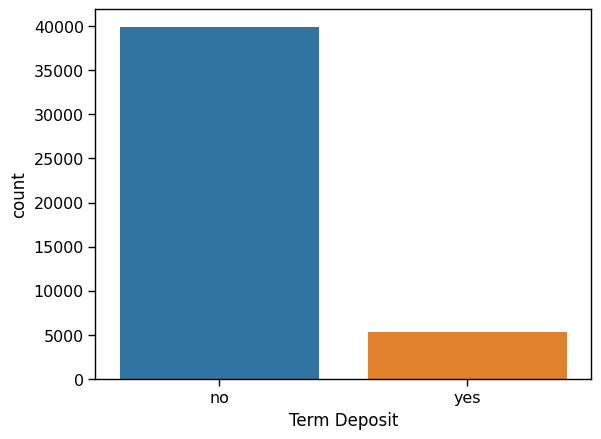

In [ ]:
#Check the Data set is balanced or not based on target values in classification

#total patient count based on cardio_results
sns.countplot(x='Term Deposit',data=data2)
plt.show()

In [ ]:
data2['Term Deposit'].value_counts()

no     39914
yes     5289
Name: Term Deposit, dtype: int64

In [50]:
data3 = data2.copy()

In [51]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [55]:
# Assuming X is your feature matrix and y is your target variable
categorical_vars = ['job', 'marital', 'education', 'Gender', 'Insurance', 'housing', 'loan', 'contact','poutcome']
numerical_vars = ['age', 'Annual Income', 'balance', 'duration', 'campaign', 'last_contact_day', 'previous', 'Count_Txn']

# Encode categorical variables
X_categorical = pd.get_dummies(data2[categorical_vars], drop_first=True)

# Combine categorical and numerical variables
X_combined = pd.concat([X_categorical, data2[numerical_vars]], axis=1)

# Target variable
y = data2['term deposit']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Resampling using a pipeline for correcting the imbalanced data
oversampler = RandomOverSampler(sampling_strategy='minority')
undersampler = RandomUnderSampler(sampling_strategy='majority')

pipeline = Pipeline([
    ('oversample', oversampler),
    ('undersample', undersampler)
])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [57]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7955
           1       0.59      0.45      0.51      1086

    accuracy                           0.90      9041
   macro avg       0.76      0.71      0.73      9041
weighted avg       0.89      0.90      0.89      9041



In [58]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.89948846 0.90293142 0.89961283 0.89809181 0.90251659]
0.9005282221112918


**Inference:**
- The model performs well in predicting Class 0 (No)

- For Class 1 (Yes), the model has lower precision, recall, and F1-score, indicating a lower level of performance for this class.

- The overall accuracy of the model is 90%.

In [59]:
# XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [61]:
model_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
model_xgb.score(X_test,y_test)

0.8700365003871253

In [64]:
# Train a XGBoost classifier
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)
model_xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7955
           1       0.47      0.72      0.57      1086

    accuracy                           0.87      9041
   macro avg       0.72      0.81      0.75      9041
weighted avg       0.90      0.87      0.88      9041



In [63]:
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.89340523 0.9003042  0.89587942 0.8965708  0.90417588]
0.8980671071563592


**Inference:**
- The model performs well in predicting Class 0 (No)

- For Class 1 (Yes), the model has lower precision, recall, and F1-score compared to Class 0.

- The overall accuracy of the model is 86%, but it's important to consider the individual class metrics for a more detailed evaluation.

###**3. Model Improvement Strategies:**


**Discuss potential methods or approaches to enhance model performance. This could include feature engineering, different algorithms, or refining the data preprocessing steps.**

- Using winsorizing or applying mathematical transformation functions for removing outliers might affect the performance of the model.

- Model performance will increase if the outliers present in other features are removed efficiently.

- Since the data was imbalanced, instead of applying resampling, using different methods like SMOTE can improve the performance of the model.

- By exploring hyperparameter tuning for XGBoost to find a combination that optimizes model performance.

- While the model performs well for the majority class ('no'), there is room for improvement in predicting the minority class ('yes'). Balancing precision and recall, especially for the positive class, could be a key focus for model enhancement.


##CONCLUSION
- The model built using random classifier seemed to have a higher accuracy when compared to XGBoost.

- The XGBoost model achieved a slightly lower accuracy compared to the RandomForest model (86% vs. 90%).

- Random classifier model gives 90% accuracy, so it implies that since the data is imbalanced, random classifier might simply be predicting the majority class most of the time.

- In the context of term deposit prediction, high recall means capturing more customers who are likely to take a term deposit:

- XGBoost model (Recall: 72%) outperforms the Random Forest model (Recall: 45%). The XGBoost model is better at identifying customers who are likely to take a term deposit.





